In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
import matplotlib.patheffects as pe
import matplotlib_inline.backend_inline
import matplotlib.gridspec as gridspec
import matplotlib as mpl
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from mpl_toolkits.mplot3d import Axes3D

num_points = 10_000
r = np.sqrt(np.random.uniform(0, 1, num_points))
theta = np.random.uniform(0, 2 * np.pi, num_points)

x = r * np.cos(theta)
y = r * np.sin(theta)

z = [r_int(x1,y1) for (x1,y1) in zip(x,y)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis_r')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('$\hat{r}$', rotation=0)

ax.set_box_aspect(aspect=None, zoom=0.85)
plt.tight_layout()
plt.show()

NameError: name 'r_int' is not defined

Avg dist to reds 0.7006172273939194
Avg dist to all other 1.3262441897550785
Avg difference: 1.0634808655633914


NameError: name 'r_int' is not defined

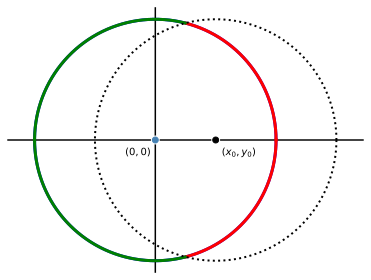

In [5]:
# <!-- collapse=True -->
def plot_shifted_circle_overlap(x0,y0):
    plt.axis('off')
    plt.axis('equal')
    
    # unit circle
    theta = np.linspace(0,2*np.pi,1000)
    xs, ys = np.cos(theta), np.sin(theta)
    plt.plot(xs, ys, lw=3, color="blue")

    # grid lines; origins
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    plt.plot(0, 0, 'o', color='steelblue',
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.text(-.25,-.125,r"$(0,0)$",
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.plot(x0, y0, 'o', color='black',
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.text(x0+.05,y0-.125,r"$(x_0,y_0)$",
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    
    # shifted circle
    plt.plot(xs + x0, ys + y0, lw=2, color='black', linestyle='dotted', zorder=5)
    dists, dists2 = [], []

    # draw in semicircles to prevent connecting across circle
    for (start,end) in [(np.pi, 2*np.pi), (0, np.pi)]:
        theta = np.linspace(start, end, 1000)
        xs, ys = np.cos(theta), np.sin(theta)
        points_within = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) <= 1])
        points_outside = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) > 1])
        plt.plot(points_within[:, 0], points_within[:, 1], lw=3, c='red')
        plt.plot(points_outside[:, 0], points_outside[:, 1], lw=3, c='green')
        dists += [np.linalg.norm([x0-p[0],y0-p[1]]) for p in points_within]
        # dists2 += [np.linalg.norm([x0-p[0],y0-p[1]]) for p in -points_within]
        dists2 += [np.linalg.norm([x-x0,y-y0]) for (x,y) in points_outside]

    print("Avg dist to reds", np.mean(dists))
    print("Avg dist to all other", np.mean(dists2))
    print("Avg difference:", np.mean(dists + dists2))
    print(r_int(x0,y0))
    plt.show()

plot_shifted_circle_overlap(.5, .0)
# <end collapse>

In [ ]:
# <!-- collapse=True -->
def plot_shifted_circle_overlap(x0,y0):
    plt.axis('off')
    plt.axis('equal')
    
    # unit circle
    theta = np.linspace(0,2*np.pi,1000)
    xs, ys = np.cos(theta), np.sin(theta)

    # grid lines; origins
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    # plt.plot(0, 0, 'o', color='steelblue',
    #         path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    # plt.text(-.25,-.125,r"$(0,0)$",
    #         path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    # plt.plot(x0, y0, 'o', color='black',
    #         path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    # plt.text(x0+.05,y0-.125,r"$(x_0,y_0)$",
    #         path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    
    # # shifted circle
    plt.plot(xs + x0, ys + y0, lw=2, color='black', linestyle='dotted', zorder=5)

    # draw in semicircles to prevent connecting across circle
    for (start,end) in [(np.pi, 2*np.pi), (0, np.pi)]:
        theta = np.linspace(start, end, 1000)
        xs, ys = np.cos(theta), np.sin(theta)
        points_within = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) <= 1])
        points_outside = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) > 1])
        plt.scatter(points_within[:, 0], points_within[:, 1], s=3, c=np.sqrt((points_within[:, 0]-x0)**2+(points_within[:, 1]-y0)**2), cmap='Reds_r')
        if start == np.pi: plt.colorbar()
        plt.scatter(points_outside[:,0], points_outside[:,1], s=3, c=np.sqrt((points_outside[:,0]-x0)**2+(points_outside[:,1]-y0)**2), cmap='Blues')
        if start == np.pi: plt.colorbar()
        
    plt.show()

plot_shifted_circle_overlap(.95, .0)
# <end collapse>

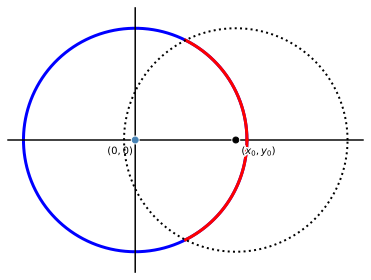

In [6]:
# <!-- collapse=True -->
def plot_shifted_circle_overlap(x0,y0):
    plt.axis('off')
    plt.axis('equal')
    
    # unit circle
    theta = np.linspace(0,2*np.pi,1000)
    xs, ys = np.cos(theta), np.sin(theta)
    plt.plot(xs, ys, lw=3, color="blue")

    # grid lines; origins
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    plt.plot(0, 0, 'o', color='steelblue',
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.text(-.25,-.125,r"$(0,0)$",
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.plot(x0, y0, 'o', color='black',
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.text(x0+.05,y0-.125,r"$(x_0,y_0)$",
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    
    # shifted circle
    plt.plot(xs + x0, ys + y0, lw=2, color='black', linestyle='dotted', zorder=5)

    # draw in semicircles to prevent connecting across circle
    for (start,end) in [(np.pi, 2*np.pi), (0, np.pi)]:
        theta = np.linspace(start, end, 1000)
        xs, ys = np.cos(theta), np.sin(theta)
        points_within = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) <= 1])
        plt.plot(points_within[:, 0], points_within[:, 1], lw=3, c='red')
        # plt.scatter(points_2[:, 0], points_2[:, 1], lw=3, c='green', s=1, zorder=10)
    # for t in np.linspace(0, np.pi, 1000):
    #     if np.sqrt(4-4*((y0-x0*np.tan(t))**2)*np.cos(t)**2) <= 1:
    #         (a1,b1), (a2,b2) = diameter_intercepts(x0,y0,t)
    #         plt.plot([a1,a2],[b1,b2], c='black')
        
    plt.show()

plot_shifted_circle_overlap(.9, .0)
# <end collapse>

NameError: name 'n' is not defined

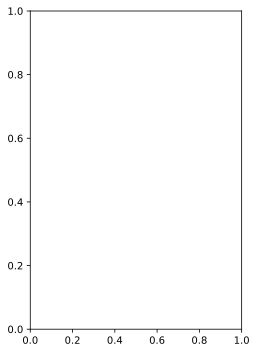

In [7]:
# <!-- collapse=True -->

def avg_r(x0, y0, n):
    t = 2*np.pi/n
    dists = [np.linalg.norm([np.cos(t*i)-x0, np.sin(t*i)-y0]) for i in range(n)]
    return np.mean(dists)

def plot_lines(x0, y0, n, ax=None):
    ax = plt.gca() if ax is None else ax
    
    # rays
    p0 = np.array([x0,y0])
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    dists = []
    
    for angle in angles:
        x = np.cos(angle)
        y = np.sin(angle)
        p = np.array([x,y])
        
        dists.extend([np.linalg.norm(p-p0)])
        ax.plot([x,x0], [y,y0], lw=1, color='black')

    return np.mean(dists)

# unit circle
(x0, y0) = (.15, .15)
ns = [12, 12]
theta = np.linspace(0,2*np.pi,1000)
xs, ys = np.cos(theta), np.sin(theta)

fig  = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

# PLOT 1
s = spec[0,0]
ax = fig.add_subplot(s)
r_hat = plot_lines(0, 0, n, ax=ax)

ax.plot(xs, ys, lw=3)
ax.plot(0, 0, 'o', color='steelblue',
        path_effects=[pe.withStroke(linewidth=3, foreground='w')])
ax.text(-.25,-.15,r"$(0,0)$",
        path_effects=[pe.withStroke(linewidth=3, foreground='w')])
ax.set_yticklabels([])
ax.set_xticklabels([])
t = 2*np.pi/n
ax.plot([np.cos(t*i) for i in range(n)], [np.sin(t*i) for i in range(n)], 'o', color='black', alpha=.5)

ax.set_aspect('equal')
ax.set_title(r"$\hat{r}=" + rf"{r_hat:.6f}$")
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax.grid()

# PLOT 2
s = spec[0,1]
ax = fig.add_subplot(s)
r_hat = plot_lines(x0, y0, n, ax=ax)

ax.plot(xs, ys, lw=3)
ax.plot(0, 0, 'o', color='steelblue',
        path_effects=[pe.withStroke(linewidth=3, foreground='w')])
ax.text(-.25,-.15,r"$(0,0)$",
        path_effects=[pe.withStroke(linewidth=3, foreground='w')])
ax.set_yticklabels([])
ax.set_xticklabels([])

# points
ax.plot(x0, y0, 'o', color='black',
        path_effects=[pe.withStroke(linewidth=3, foreground='w')])
ax.text(x0, y0-.15, r'$(x_0,y_0)$',
        path_effects=[pe.withStroke(linewidth=3, foreground='w')])
t = 2*np.pi/n
ax.plot([np.cos(t*i) for i in range(n)], [np.sin(t*i) for i in range(n)], 'o', color='black', alpha=.5)

ax.set_aspect('equal')
ax.set_title(r"$\hat{r}=" + rf"?$")
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax.grid()

plt.savefig("../../images/circles-splash.png", dpi=330)

# <end collapse>

---

# Area changes over time

In [6]:
def r_int(x0=0, y0=0):
    f = lambda t : np.sqrt((np.cos(t)-x0)**2 + (np.sin(t)-y0)**2)
    return scipy.integrate.quad(f, 0, 2*np.pi)[0]/(2*np.pi)

In [7]:
#def area_cutout(x):
#    return 1/8 * (-np.pi * (x**2 - 4) - 2 * np.sqrt(-x**2 * (x**2 - 4)))

In [8]:
def area_cutout(x):
   return -1/8 * np.sqrt(4 - x**2) * (2 * np.sqrt(x**2) + np.pi * (x-2))

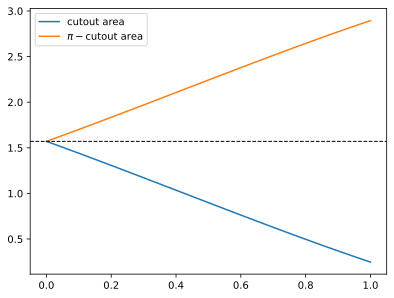

In [12]:
plt.plot(xs:=np.linspace(0,1,100), area_cutout(xs), label='cutout area')
plt.plot(xs, np.pi-area_cutout(xs), label=r'$\pi-$cutout area')
plt.axhline(np.pi/2,ls='dashed',c='black',lw=1)

plt.legend()
plt.show()

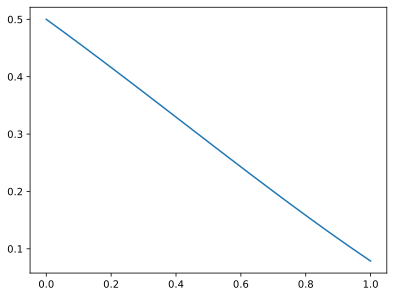

In [78]:
plt.plot(xs, area_cutout(xs)/np.pi)

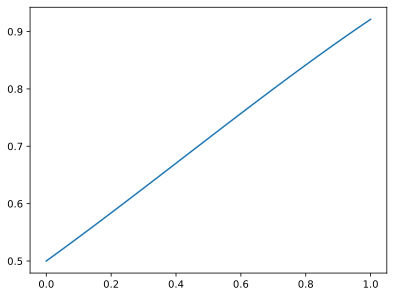

In [80]:
plt.plot(xs, (np.pi-area_cutout(xs))/np.pi)

In [81]:
np.pi - area_cutout(0)

1.5707963267948966

In [82]:
np.pi - area_cutout(.1)

1.7011400919462674

In [83]:
r_int(.95)

1.243265704270413

In [84]:
area_cutout(.95)/np.pi

0.09794488655667585

In [85]:
(np.pi-area_cutout(.95))/np.pi

0.9020551134433241

In [86]:
def area_sc(x):
    return -1/8 * np.pi * (x-2) * np.sqrt(4-x**2)

In [110]:
area_sc(.95)/area_sc(0)

0.46199254255344857

In [111]:
area_cutout(.95)/area_cutout(0)

0.1958897731133517

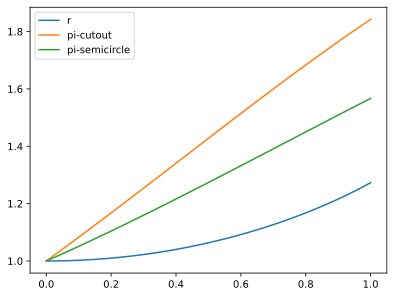

In [93]:
plt.plot(xs, [r_int(x) for x in xs], label="r")
plt.plot(xs, (np.pi-area_cutout(xs))/(np.pi/2), label="pi-cutout")
plt.plot(xs, (np.pi-area_sc(xs))/(np.pi/2), label="pi-semicircle")
plt.legend()

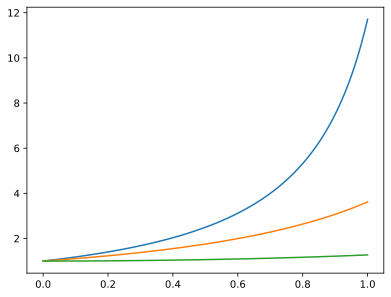

In [140]:
plt.plot(xs, (np.pi-area_cutout(xs))/(area_cutout(xs)))
plt.plot(xs, (np.pi-area_sc(xs))/(area_sc(xs)))
plt.plot(xs, [r_int(x) for x in xs], label="r")

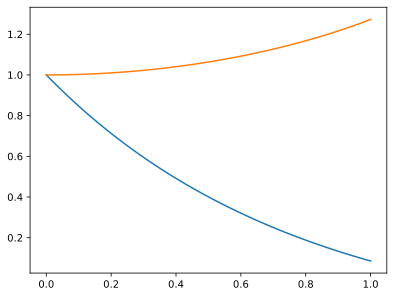

In [137]:
plt.plot(xs, (area_cutout(xs))/(np.pi-area_cutout(xs)))
plt.plot(xs, [r_int(x) for x in xs], label="r")

New formula

In [13]:
def area_A(x):
    return 1/8 * np.sqrt(1-x) * (-np.pi * np.sqrt(x+1) * (x - 2) - 2*x)

In [50]:
def area_B(x):
    return 1/8 * np.sqrt(4-x**2) * (np.pi*(2-x) - 2*x)

In [51]:
def area_C(x):
    return 1/16 * np.sqrt(4-x**2) * (np.pi*(2-x) - 2*x)

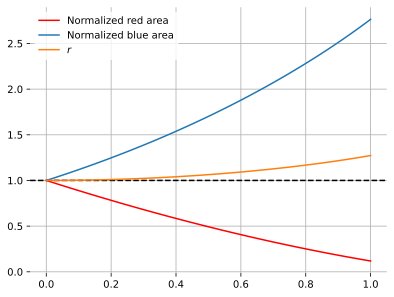

In [92]:
def area_cutout(x):
    return 1/16 * np.sqrt(4-x**2) * (np.pi*(2-x) - 2*x)

plt.grid()
plt.axhline(1, linestyle='dashed', c='black')
plt.plot(xs,
         # (area_cutout(xs)/(np.pi-np.arccos(xs/2)))/(np.pi/(2*np.pi)),
         2*area_cutout(xs)/(np.pi-np.arccos(xs/2)),
         c='red',
         label='Normalized red area')
# plt.plot(xs,
#          1+(1-(area_cutout(xs)/(np.pi-np.arccos(xs/2)))/(np.pi/(2*np.pi))),
#          c='red',
#          linestyle='dotted',
#          label='Normalized red area (reflected)')

plt.plot(xs,
         # ((np.pi/2 - area_cutout(xs))/(np.arccos(xs/2)))/(np.pi/(2*np.pi)),
         2*(np.pi/2-area_cutout(xs))/(np.arccos(xs/2)),
         label='Normalized blue area')

plt.plot(xs, [r_int(x) for x in xs], label="$r$")

l = plt.legend()
l.get_frame().set_edgecolor('w')
plt.gca().spines[:].set_visible(False)
plt.show()

In [73]:
r_int(1)-(area_C(1)/(np.pi-np.arccos(1/2)))/(np.pi/(2*np.pi))

1.1552283540991704

In [71]:
r_int(1)

1.2732395447351628

In [74]:
r_int(1)-(area_C(-1)/(np.pi-np.arccos(-1/2)))/(np.pi/(2*np.pi))

-1.0888142853461689